In [11]:
import pandas as pd
import numpy as np

data = pd.read_csv("train.csv")

lot_area = data["LotArea"]

lot_area_sorted = lot_area.sort_values()

Q1 = np.percentile(lot_area_sorted, 25)

Q3 = np.percentile(lot_area_sorted, 75)

IQR = Q3 - Q1

Tlower = Q1 - (1.5 * IQR)

Tupper = Q3 + (1.5 * IQR)

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", Tlower)
print("Upper Bound:", Tupper)

outliers = data[(data["LotArea"] < Tlower) | (data["LotArea"] > Tupper)]

print("Number of outliers detected:", len(outliers))

data_cleaned = data[(data["LotArea"] >= Tlower) & (data["LotArea"] <= Tupper)]

print("Original dataset shape:", data.shape)
print("Cleaned dataset shape:", data_cleaned.shape)


Q1: 7553.5
Q3: 11601.5
IQR: 4048.0
Lower Bound: 1481.5
Upper Bound: 17673.5
Number of outliers detected: 69
Original dataset shape: (1460, 81)
Cleaned dataset shape: (1391, 81)


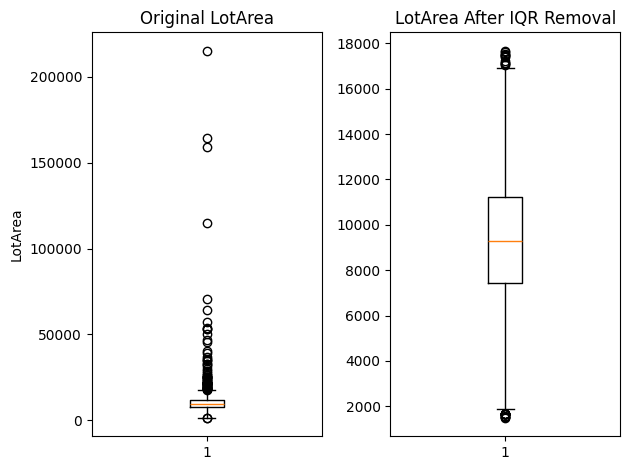

In [12]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.boxplot(data["LotArea"])
plt.title("Original LotArea")
plt.ylabel("LotArea")

plt.subplot(1, 2, 2)
plt.boxplot(data_cleaned["LotArea"])
plt.title("LotArea After IQR Removal")

plt.tight_layout()
plt.show()

